Reference:

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Import Library

In [1]:
import os

import pandas as pd

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.utils  import to_categorical
from sklearn.metrics import confusion_matrix,f1_score , accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
# gpu_devices = tf.config.experimental.list_physical_devices('GPU')
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

### Load Data

In [3]:
labels = ['PNEUMONIA', 'NORMAL']

In [4]:
def get_image(file_directory,img_size):
    
    x_data = []
    y_data = []
    
    for label in labels: 
        path = os.path.join(file_directory, label)
        
        for img in os.listdir(path):
            
                image_data = load_img(os.path.join(path, img), grayscale=True, color_mode="rgb", 
                                      target_size=(img_size, img_size)) 
                image_data = img_to_array(image_data) # Convert Images to Array Data
                x_data.append(image_data) 
                y_data.append(label)
                
    return x_data, y_data

In [5]:
train_path = "D:/Github/chest-xray-pneumonia/chest-xray-pneumonia/chest_xray/train"

In [6]:
x_train, y_train = get_image(train_path, 224)

C:\Users\ADMIN\anaconda3\envs\AlexEnv\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [7]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [8]:
x_train.shape

(5216, 224, 224, 1)

In [9]:
y_train.shape

(5216,)

In [10]:
y_train[y_train == 'NORMAL'] = 0
y_train[y_train == 'PNEUMONIA'] = 1
to_categorical(y_train)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [11]:
test_path = "D:/Github/chest-xray-pneumonia/chest-xray-pneumonia/chest_xray/test"

In [12]:
x_test, y_test = get_image(test_path, 224)

In [13]:
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [14]:
x_test.shape

(624, 224, 224, 1)

In [15]:
y_test[y_test == 'NORMAL'] = 0
y_test[y_test == 'PNEUMONIA'] = 1
to_categorical(y_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Baseline CNN Model

In [16]:
datagen1 = ImageDataGenerator(
                rescale=1.0/224.0)

In [17]:
datagen1.fit(x_train)
datagen1.fit(x_test)

In [30]:
# define cnn model
def define_model():
        
    model = Sequential()
    model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,1)))
    model.add(MaxPool2D((2,2) ,padding = 'same'))
    model.add(Conv2D(48 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) ,padding = 'same'))
    model.add(Dropout(0.1))
    model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) , padding = 'same'))
    model.add(Conv2D(96 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) , padding = 'same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) ,  padding = 'same'))
    model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) ,  padding = 'same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    return model

In [31]:
# define model
model1 = define_model()

In [32]:
history1 = model1.fit(datagen1.flow(x_train,y_train, batch_size = 32) ,
                      epochs = 10, steps_per_epoch = y_train.shape[0]/32,
                      validation_data = datagen1.flow(x_test, y_test, batch_size = 32))

Epoch 1/10
163/163 [==============================] - 74s 453ms/step - loss: 0.4380 - accuracy: 0.7906 - val_loss: 1.4157 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 75s 461ms/step - loss: 0.2218 - accuracy: 0.9087 - val_loss: 2.5593 - val_accuracy: 0.7804
Epoch 3/10
163/163 [==============================] - 75s 460ms/step - loss: 0.1258 - accuracy: 0.9505 - val_loss: 0.9484 - val_accuracy: 0.7580
Epoch 4/10
163/163 [==============================] - 78s 476ms/step - loss: 0.0906 - accuracy: 0.9674 - val_loss: 0.4395 - val_accuracy: 0.7372
Epoch 5/10
163/163 [==============================] - 82s 501ms/step - loss: 0.0667 - accuracy: 0.9780 - val_loss: 1.8302 - val_accuracy: 0.7260
Epoch 6/10
163/163 [==============================] - 80s 489ms/step - loss: 0.0604 - accuracy: 0.9780 - val_loss: 2.6909 - val_accuracy: 0.7708
Epoch 7/10
163/163 [==============================] - 76s 469ms/step - loss: 0.0556 - accuracy: 0.9789 - val_loss: 2.2624 - val_ac

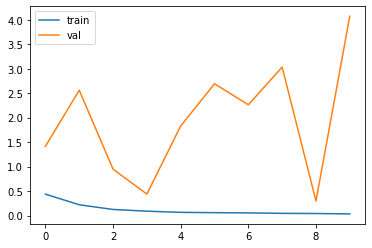

In [33]:
# plot training history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [34]:
y_predict = np.round(model1.predict(x_test)).astype(int)
y_predict = y_predict.flatten()
y_predict = pd.Series(y_predict)

In [35]:
y_test_1 =  pd.Series(y_test)
y_test_1 = (y_test_1).astype(int)

In [36]:
tn, fp, fn, tp =confusion_matrix(y_test_1, y_predict).ravel()

In [37]:
precision  = tp / (tp + fp); precision

0.9185393258426966

In [38]:
recall = tp / (tp + fn); recall

0.8384615384615385

In [39]:
accuracy_score(y_test_1, y_predict)

0.8525641025641025

The Dataset is imbalanced. Precision = 92%, Recall = 84%, Accuracy = 85%, F1-Score = 87%

### Data Augmentation

In [128]:
datagen2 = ImageDataGenerator(
                rescale=1.0/244.0,
                rotation_range = 6,  
                zoom_range = 0.30,
                width_shift_range=0.20,  
                height_shift_range=0.25)

In [129]:
datagen2.fit(x_train)

In [130]:
# define cnn model
def define_model2():
        
    model = Sequential()
    model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,1)))
    model.add(MaxPool2D((2,2) ,padding = 'same'))
    model.add(Conv2D(48 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) ,padding = 'same'))
    model.add(Dropout(0.1))
    model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Conv2D(64, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPool2D((2,2) , padding = 'same'))
    model.add(Conv2D(96 , (3,3) , strides = 2 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) , padding = 'same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPool2D((2,2) ,  padding = 'same'))
    model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) ,  padding = 'same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    return model

In [131]:
# define model
model2 = define_model2()

In [132]:
history2 = model2.fit(datagen2.flow(x_train,y_train, batch_size = 32) ,
                      epochs = 6, steps_per_epoch = y_train.shape[0]/32,
                      validation_data = datagen2.flow(x_test, y_test, batch_size = 32))

Epoch 1/6
163/163 [==============================] - 92s 564ms/step - loss: 0.5190 - accuracy: 0.7462 - val_loss: 0.7560 - val_accuracy: 0.6346
Epoch 2/6
163/163 [==============================] - 91s 559ms/step - loss: 0.3913 - accuracy: 0.8150 - val_loss: 0.4427 - val_accuracy: 0.7772
Epoch 3/6
163/163 [==============================] - 91s 557ms/step - loss: 0.3165 - accuracy: 0.8577 - val_loss: 0.3528 - val_accuracy: 0.8397
Epoch 4/6
163/163 [==============================] - 91s 555ms/step - loss: 0.2833 - accuracy: 0.8767 - val_loss: 0.3015 - val_accuracy: 0.8189
Epoch 5/6
163/163 [==============================] - 90s 553ms/step - loss: 0.2793 - accuracy: 0.8760 - val_loss: 0.8131 - val_accuracy: 0.8349
Epoch 6/6
163/163 [==============================] - 91s 556ms/step - loss: 0.2508 - accuracy: 0.8886 - val_loss: 0.3936 - val_accuracy: 0.7917


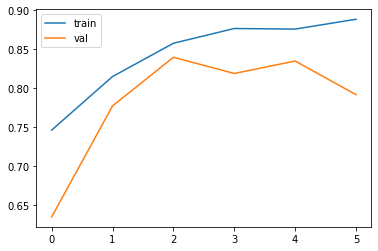

In [133]:
# plot training history
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [134]:
y_predict2 = np.round(model2.predict(x_test)).astype(int)
y_predict2 = y_predict2.flatten()
y_predict2 = pd.Series(y_predict2)

In [135]:
y_test_2 =  pd.Series(y_test)
y_test_2 = (y_test_2).astype(int)

In [136]:
accuracy_score(y_test_2, y_predict2)

0.8477564102564102

In [138]:
tn, fp, fn, tp =confusion_matrix(y_test_2, y_predict2).ravel()

In [139]:
precision  = tp / (tp + fp); precision

0.8791773778920309

In [140]:
recall = tp / (tp + fn); recall

0.8769230769230769

The Dataset is imbalanced. Precision = 88%, Recall = 88%, Accuracy = 85%, F1-Score = 88%